# **Background**
HR professionals generally lag behind with respect to analytics and data visualization competency. Thus, Dr. Carla Patalano set out to create their own HR-related dataset, which is used in one of the graduate MSHRM courses called HR Metrics and Analytics, at New England College of Business. He created this
data set.
We will use the data set to analyze the data and make some prediction models.

In [1]:
import pandas as pd
import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

**1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)**

In [3]:
# Code Here
salary_stats = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean'])
salary_stats = salary_stats.rename(columns={
    'min': 'min_salary',
    'median': 'median_salary',
    'max': 'max_salary',
    'mean': 'average_salary'
})

print(salary_stats)

                 min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000


**2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)**

In [4]:
#Code Here

termination_counts = data.groupby('TermReason').size().reset_index(name='total_termination')
top_5_termination = termination_counts.nlargest(5, 'total_termination')
top_5_termination.set_index('TermReason', inplace=True)

top_5_termination


,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


**3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)**

In [5]:
#Code Here
exceeds_df = data[data['PerformanceScore'] == 'Exceeds']
top_recruitment_source = exceeds_df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).reset_index()

top_recruitment_source.columns = ['RecruitmentSource', 'total_recruitment']
top_recruitment_source.set_index('RecruitmentSource', inplace=True)

top_recruitment_source

,total_recruitment
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


**4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)**

In [6]:
# Code Here
department_managers = data.groupby('Department')['ManagerName'].nunique().reset_index()
department_managers.columns = ['Department', 'Total Managers']
department_managers.set_index('Department', inplace=True)

department_managers


,Total Managers
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


**5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)**

In [7]:
#Code Here
print(data.groupby(by=['Sex'])['Termd'].value_counts(normalize=True).rename('Termd'))

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

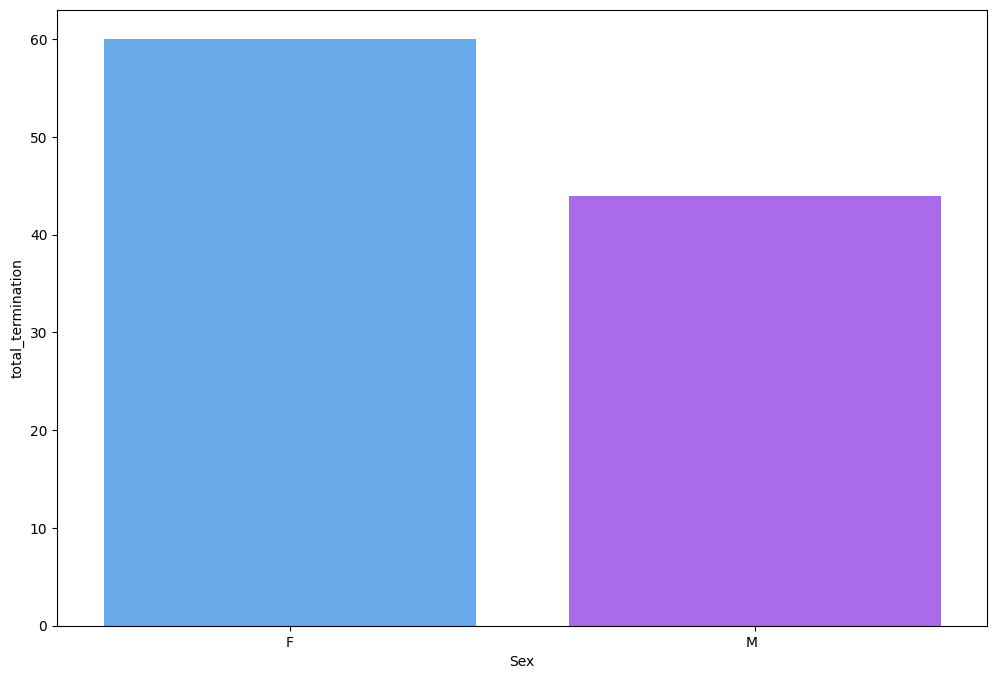

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

**6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>**
*bentuk output di bawah hanya contoh*

<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

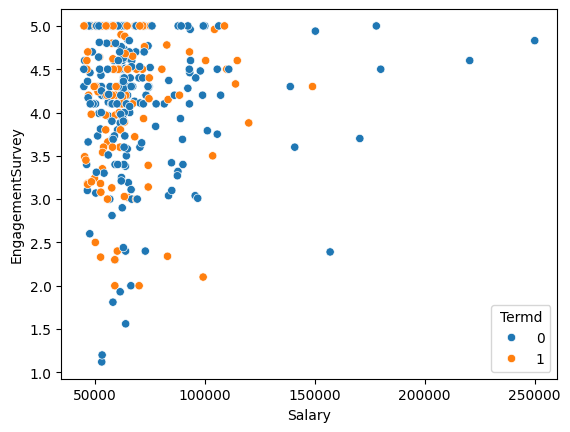

In [9]:
#Code Here
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd',data=data)

**7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>**
*bentuk output di bawah hanya contoh*

<Axes: xlabel='total_termination', ylabel='Department'>

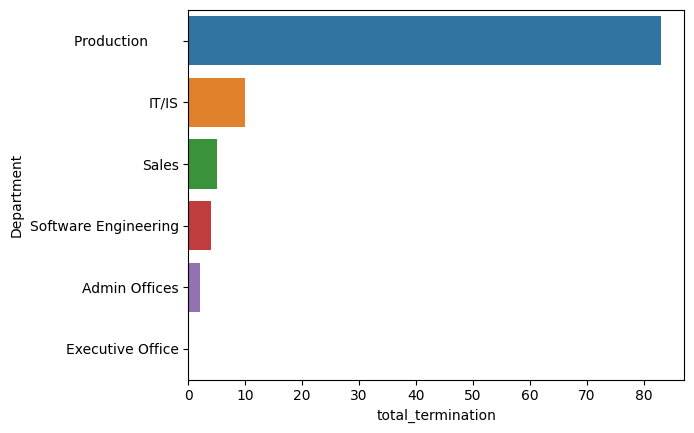

In [10]:
#Code Here
dbarchart = data.groupby(by=['Department']).agg(total_termination=('Termd','sum')).sort_values(by='total_termination', ascending=False)

sns.barplot(x='total_termination', y='Department', hue="Department",data=dbarchart)

**8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>**
*bentuk output di bawah hanya contoh*

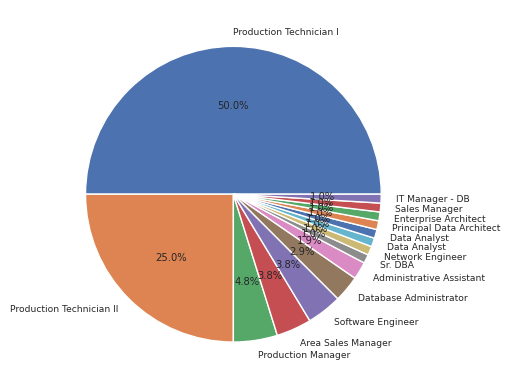

In [11]:
#Code Here
dpai = data.groupby(by=['Position']).agg(total_termination=('Termd','sum')).sort_values(by='total_termination', ascending=False)
dpai = dpai[dpai['total_termination'] != 0]

sns.set(font_scale=0.6)
plt.pie(dpai['total_termination'], labels=dpai.index, autopct='%1.1f%%')
plt.show()

**9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)**

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

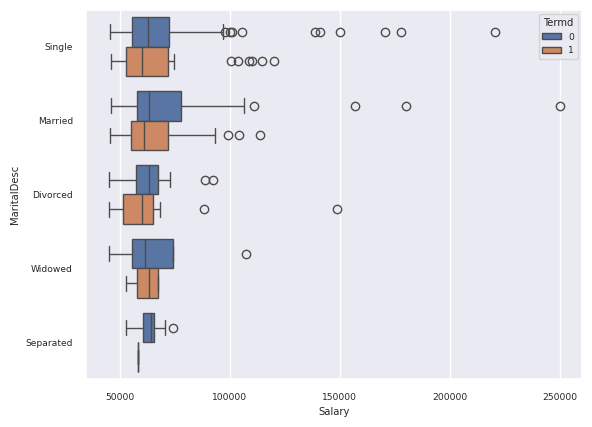

In [12]:
#Code Here
sns.boxplot(x="Salary", y='MaritalDesc', hue='Termd', data=data)

**10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)**

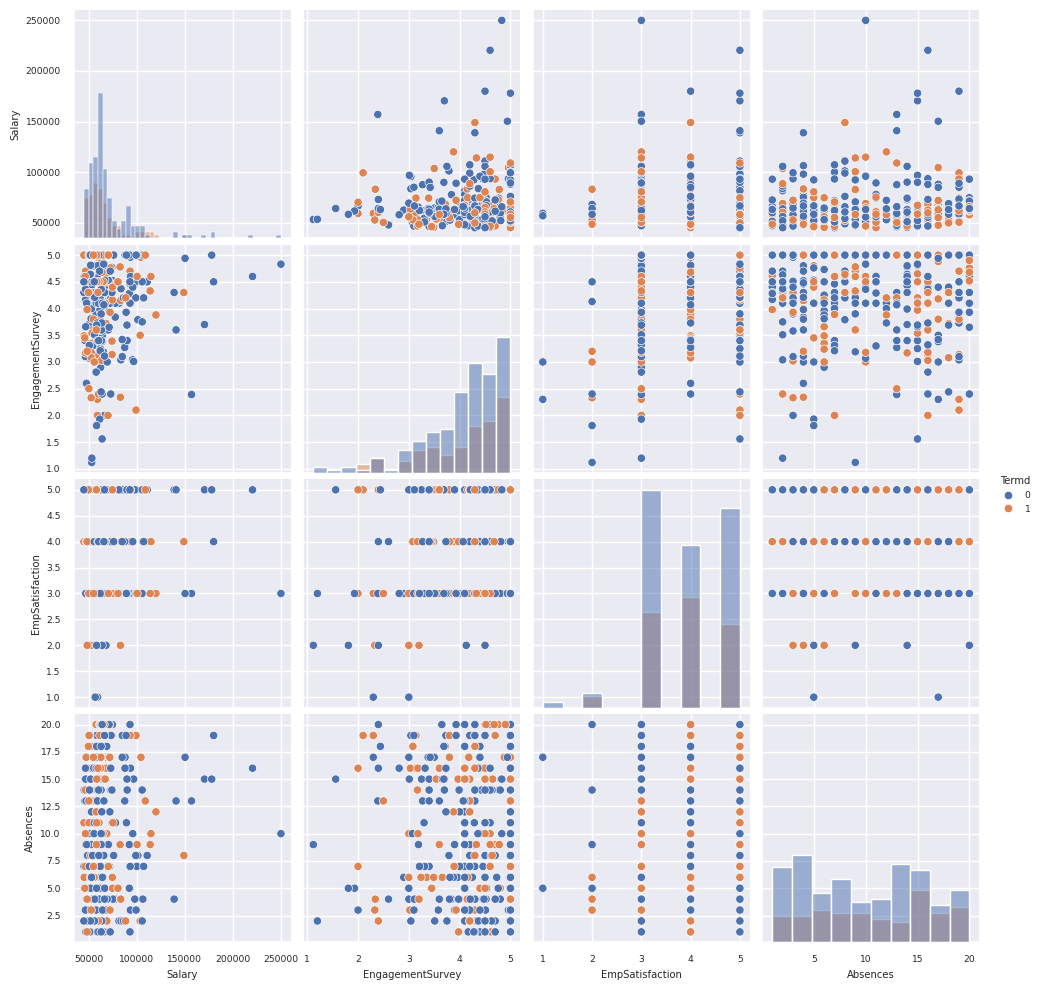

In [13]:
#Code Here
sns.pairplot(data, hue='Termd', vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], diag_kind='hist')

# Insight (Answering the Question)

**11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>**

**12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [15]:
data['ManagerName'].value_counts()

,count
ManagerName,
Michael Albert,22
Kissy Sullivan,22
Elijiah Gray,22
Kelley Spirea,22
Brannon Miller,22
Ketsia Liebig,21
David Stanley,21
Amy Dunn,21
Webster Butler,21


In [16]:
data['PerformanceScore'].value_counts()

,count
PerformanceScore,
Fully Meets,243
Exceeds,37
Needs Improvement,18
PIP,13


**11. Is there any relationship between who a person works for (their manager) and their performance score?**

In [17]:
manager_performance = data.groupby('ManagerName')['PerfScoreID'].mean().reset_index()
manager_performance

,ManagerName,PerfScoreID
0,Alex Sweetwater,3.111111
1,Amy Dunn,2.904762
2,Board of Directors,3.000000
3,Brandon R. LeBlanc,3.000000
4,Brannon Miller,2.818182
5,Brian Champaigne,3.000000
6,David Stanley,3.000000
7,Debra Houlihan,2.666667
8,Elijiah Gray,3.000000
9,Eric Dougall,3.250000


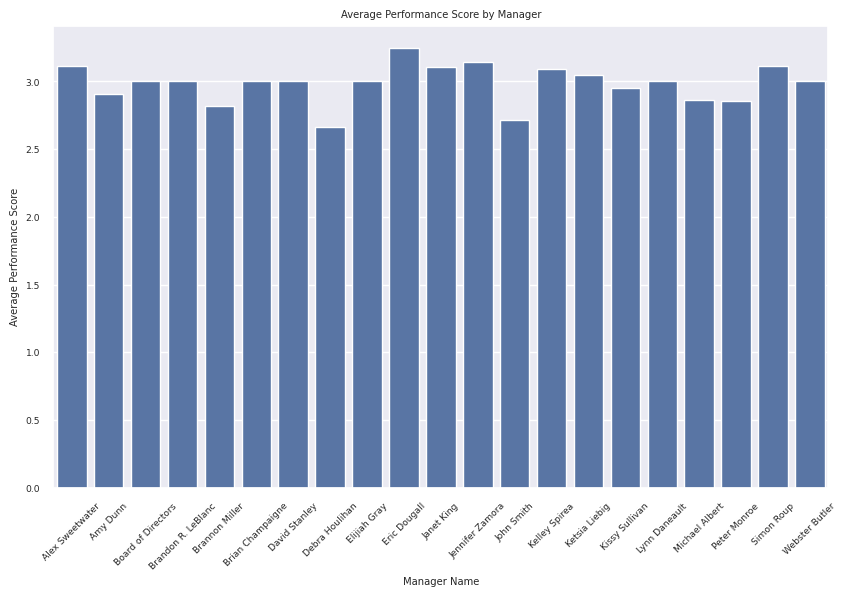

In [18]:
# Visualisasi rata-rata skor performa
plt.figure(figsize=(10, 6))
sns.barplot(x='ManagerName', y='PerfScoreID', data=manager_performance)
plt.xticks(rotation=45)
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Average Performance Score')
plt.show()

Conclusion

Yes, there is relationship between who a person works for (their manager) and their performance score. The data shows that performance scores vary by manager, which means a manager's leadership style can impact employee performance. Some managers have higher average scores, suggesting that they are more effective at motivating and supporting their teams.

**12. What are our best recruiting sources if we want to ensure a low ratio of termination?**

In [19]:
data['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [20]:
termination_ratios = data.groupby('RecruitmentSource')['Termd'].value_counts(normalize=True).reset_index()
terminated_ratios = termination_ratios[termination_ratios['Termd'] == 1]

terminated_ratios.columns = ['RecruitmentSource', 'Termd', 'TerminationRatio']
terminated_ratios = terminated_ratios.sort_values(by=['TerminationRatio'], ascending=True)

terminated_ratios

,RecruitmentSource,Termd,TerminationRatio
16,Website,1,0.076923
5,Employee Referral,1,0.161290
11,LinkedIn,1,0.236842
9,Indeed,1,0.241379
1,CareerBuilder,1,0.478261
14,Other,1,0.500000
2,Diversity Job Fair,1,0.551724
6,Google Search,1,0.612245
12,On-line Web application,1,1.000000


Conclusion

The best recruitment sources to keep the layoff ratio low are **Websites** and **Employee Referrals**. This suggests that companies should focus on these two recruitment sources to reduce the risk of future terminations.